Task 4 - Sales Prediction Using Python

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_sales = pd.read_csv('sales.csv')
df_sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
# Checking if the data has null values.
df_sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# Analysis of the data.
df_sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df_sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [11]:
# Visualise the dataset.
# Import required libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [12]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

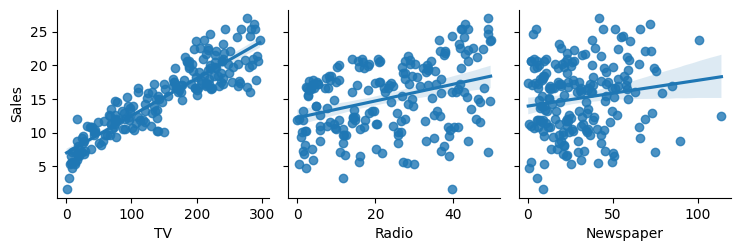

In [13]:
sns.pairplot(df_sales, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'reg')
plt.show()

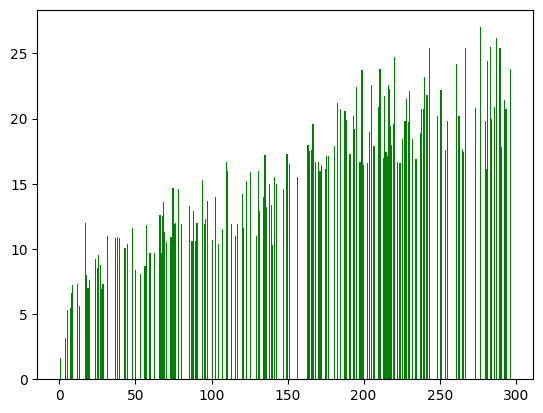

In [14]:
# TV Sales
plt.bar(df_sales['TV'], df_sales['Sales'], color = 'green')
plt.show()

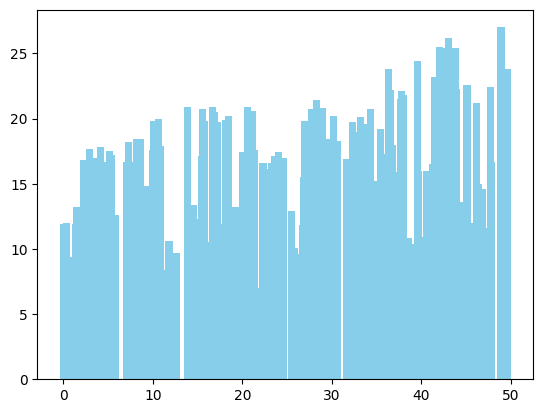

In [15]:
# Radio Sales
plt.bar(df_sales['Radio'], df_sales['Sales'], color = 'skyblue')
plt.show()

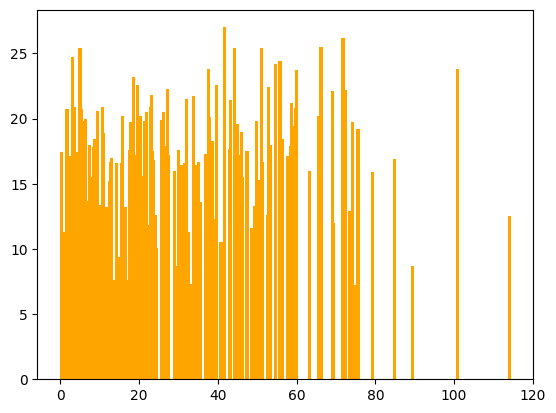

In [16]:
# Newspaper Sales
plt.bar(df_sales['Newspaper'], df_sales['Sales'], color = 'orange')
plt.show()

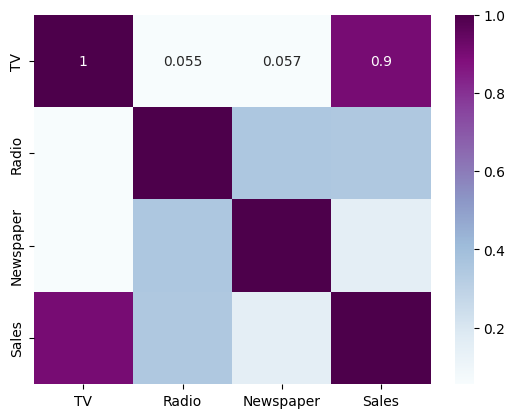

In [17]:
sns.heatmap(df_sales.corr(), annot = True, cmap = "BuPu")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X = df_sales[['TV', 'Radio', 'Newspaper']]
y = df_sales['Sales']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
# Import required libraries.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [21]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print("The score in train:" , lr_model.score(X_train , y_train))
print("The Score in test:" , lr_model.score(X_test , lr_y_pred))

The score in train: 0.9031720464533558
The Score in test: 1.0


In [22]:
# Decision Tree Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
print("The score in train:" , gb_model.score(X_train , y_train))
print("The Score in test:" , gb_model.score(X_test , gb_y_pred))

The score in train: 0.9937863863720515
The Score in test: 1.0


In [23]:
# Decision Tree Regression
fr_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
fr_model.fit(X_train, y_train)
fr_y_pred = fr_model.predict(X_test)
print("The score in train:" , fr_model.score(X_train , y_train))
print("The Score in test:" , fr_model.score(X_test , fr_y_pred))

The score in train: 0.9918462014553825
The Score in test: 1.0


In [24]:
# Comparing the different techniques.
compare = pd.DataFrame(
    {"Models": ["Linear Regression", "Gradient Boosting", "Random Forest"],
     "Scores": [lr_model.score(X_test , fr_y_pred), gb_model.score(X_test , fr_y_pred), fr_model.score(X_test , fr_y_pred)]
     }
    )
compare.sort_values(by = 'Scores', ascending = False)

,Models,Scores
2,Random Forest,1.000000
1,Gradient Boosting,0.987707
0,Linear Regression,0.862967
